# Clasificación de Clientes por Probabilidad de Recompra

Este notebook simula datos de clientes de una empresa de repuestos automotrices y entrena un modelo de clasificación para predecir si un cliente volverá a comprar en un período determinado.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.utils import resample
import matplotlib.pyplot as plt

In [5]:
# Semilla para reproducibilidad
np.random.seed(42)

# 1. Crear dataset simulado
n_customers = 1000

In [6]:
df = pd.DataFrame({
    'days_since_last_purchase': np.random.exponential(scale=60, size=n_customers),  # días desde la última compra
    'avg_ticket': np.random.normal(loc=50, scale=15, size=n_customers),             # ticket promedio
    'purchase_frequency': np.random.poisson(lam=3, size=n_customers),               # frecuencia mensual de compras
    'channel': np.random.choice([0, 1], size=n_customers, p=[0.7, 0.3]),             # 0 = tienda física, 1 = online
    'category_focus': np.random.choice([0, 1, 2], size=n_customers, p=[0.4, 0.4, 0.2]),  # 0 = frenos, 1 = motor, 2 = eléctricos
})

In [7]:
# Etiqueta: recompra (1) o no recompra (0)
df['recompra'] = np.where(
    (df['days_since_last_purchase'] < 45) & 
    (df['purchase_frequency'] >= 3), 
    np.random.choice([1, 0], size=n_customers, p=[0.8, 0.2]),
    np.random.choice([1, 0], size=n_customers, p=[0.1, 0.9])
)

df.head()

,days_since_last_purchase,avg_ticket,purchase_frequency,channel,category_focus,recompra
0,28.156085,52.665515,3,0,2,1
1,180.607286,29.969835,2,0,2,0
2,79.004742,55.702968,1,0,2,0
3,54.776553,59.158786,0,1,0,0
4,10.177492,58.396857,1,1,2,0


In [8]:
# 2. Dividir en entrenamiento y prueba
X = df.drop(columns='recompra')
y = df['recompra']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# 3. Balancear solo el conjunto de entrenamiento
train_df = X_train.copy()
train_df['recompra'] = y_train

majority = train_df[train_df.recompra == 0]
minority = train_df[train_df.recompra == 1]

minority_upsampled = resample(
    minority,
    replace=True,
    n_samples=len(majority),
    random_state=42
)

train_balanced = pd.concat([majority, minority_upsampled])
X_train_bal = train_balanced.drop(columns='recompra')
y_train_bal = train_balanced['recompra']


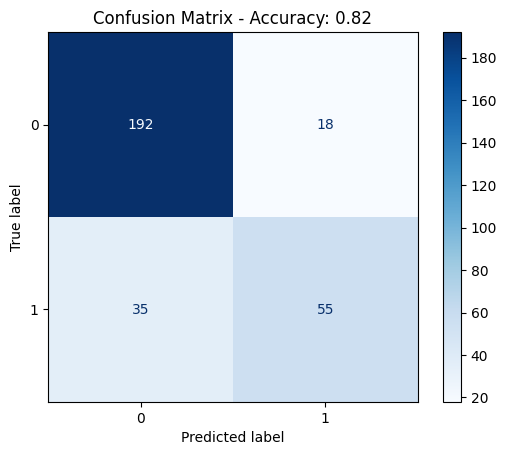

In [10]:
# 4. Entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)

In [11]:
# 5. Evaluar en conjunto de prueba original
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

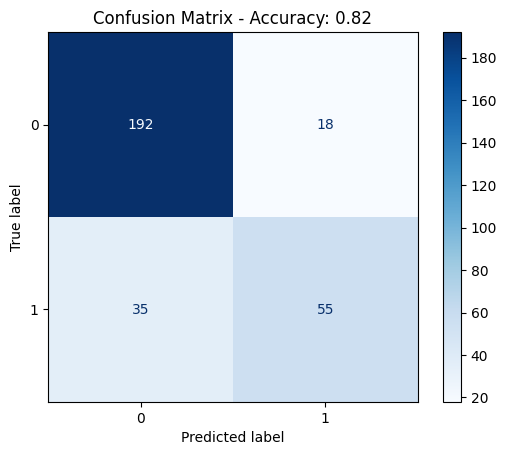

In [12]:
# 6. Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix - Accuracy: {acc:.2f}")
plt.show()